# Learning Rate Scheduling

## Target
- Add learning rate (LR) scheduling to improve overall accuracy with consistant of 99.4%.

## Results
- Total parameters: 7,624
- Best Training Accuracy: 97.60% - 15th Epoch
- Best Testing Accuracy: 99.48% - 11th Epoch

## Analysis
- Lambda scheduling with lambda set to 0.65^epoch helps us achieve our target of 99.4% testing accuracy starting from the 11th Epoch.

## Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/S7'
%cd $BASE_DIR

Mounted at /content/drive
/content/drive/My Drive/S7


In [3]:
from model_6 import Net, model_summary, model_train, model_test, draw_graphs

## Data Transformations

In [4]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.RandomAffine(degrees=7, shear=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
                                       transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [5]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Dataloader

In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Train & Test Model

In [ ]:
from torch.optim.lr_scheduler import StepLR, ExponentialLR, OneCycleLR, LambdaLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

lambda1 = lambda epoch: 0.65 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda1)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=0.4880262017250061 Batch_id=937 Accuracy=84.46: 100%|██████████| 938/938 [01:39<00:00,  9.41it/s]



Test set: Average loss: 0.0890, Accuracy: 9707/10000 (97.07%)

EPOCH: 2


Loss=0.24310088157653809 Batch_id=937 Accuracy=94.74: 100%|██████████| 938/938 [01:36<00:00,  9.76it/s]



Test set: Average loss: 0.0397, Accuracy: 9869/10000 (98.69%)

EPOCH: 3


Loss=0.12208434194326401 Batch_id=937 Accuracy=95.74: 100%|██████████| 938/938 [01:34<00:00,  9.88it/s]



Test set: Average loss: 0.0454, Accuracy: 9859/10000 (98.59%)

EPOCH: 4


Loss=0.49917522072792053 Batch_id=937 Accuracy=96.36: 100%|██████████| 938/938 [01:35<00:00,  9.83it/s]



Test set: Average loss: 0.0336, Accuracy: 9896/10000 (98.96%)

EPOCH: 5


Loss=0.16808158159255981 Batch_id=937 Accuracy=96.57: 100%|██████████| 938/938 [01:34<00:00,  9.92it/s]



Test set: Average loss: 0.0269, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


Loss=0.13319484889507294 Batch_id=937 Accuracy=96.80: 100%|██████████| 938/938 [01:38<00:00,  9.53it/s]



Test set: Average loss: 0.0256, Accuracy: 9916/10000 (99.16%)

EPOCH: 7


Loss=0.04289092496037483 Batch_id=937 Accuracy=96.92: 100%|██████████| 938/938 [01:36<00:00,  9.71it/s]



Test set: Average loss: 0.0277, Accuracy: 9909/10000 (99.09%)

EPOCH: 8


Loss=0.15397752821445465 Batch_id=937 Accuracy=97.19: 100%|██████████| 938/938 [01:37<00:00,  9.66it/s]



Test set: Average loss: 0.0209, Accuracy: 9936/10000 (99.36%)

EPOCH: 9


Loss=0.14810331165790558 Batch_id=937 Accuracy=97.23: 100%|██████████| 938/938 [01:37<00:00,  9.66it/s]



Test set: Average loss: 0.0232, Accuracy: 9932/10000 (99.32%)

EPOCH: 10


Loss=0.006525579374283552 Batch_id=937 Accuracy=97.21: 100%|██████████| 938/938 [01:35<00:00,  9.79it/s]



Test set: Average loss: 0.0208, Accuracy: 9932/10000 (99.32%)

EPOCH: 11


Loss=0.0516677051782608 Batch_id=937 Accuracy=97.34: 100%|██████████| 938/938 [01:36<00:00,  9.71it/s]



Test set: Average loss: 0.0191, Accuracy: 9948/10000 (99.48%)

EPOCH: 12


Loss=0.3774683177471161 Batch_id=937 Accuracy=97.40: 100%|██████████| 938/938 [01:36<00:00,  9.72it/s]



Test set: Average loss: 0.0175, Accuracy: 9941/10000 (99.41%)

EPOCH: 13


Loss=0.022144075483083725 Batch_id=937 Accuracy=97.39: 100%|██████████| 938/938 [01:36<00:00,  9.77it/s]



Test set: Average loss: 0.0185, Accuracy: 9945/10000 (99.45%)

EPOCH: 14


Loss=0.07377509772777557 Batch_id=937 Accuracy=97.59: 100%|██████████| 938/938 [01:37<00:00,  9.66it/s]



Test set: Average loss: 0.0209, Accuracy: 9941/10000 (99.41%)

EPOCH: 15


Loss=0.03509518876671791 Batch_id=937 Accuracy=97.60: 100%|██████████| 938/938 [01:36<00:00,  9.68it/s]



Test set: Average loss: 0.0184, Accuracy: 9942/10000 (99.42%)



Text(0.5, 1.0, 'Test Accuracy')

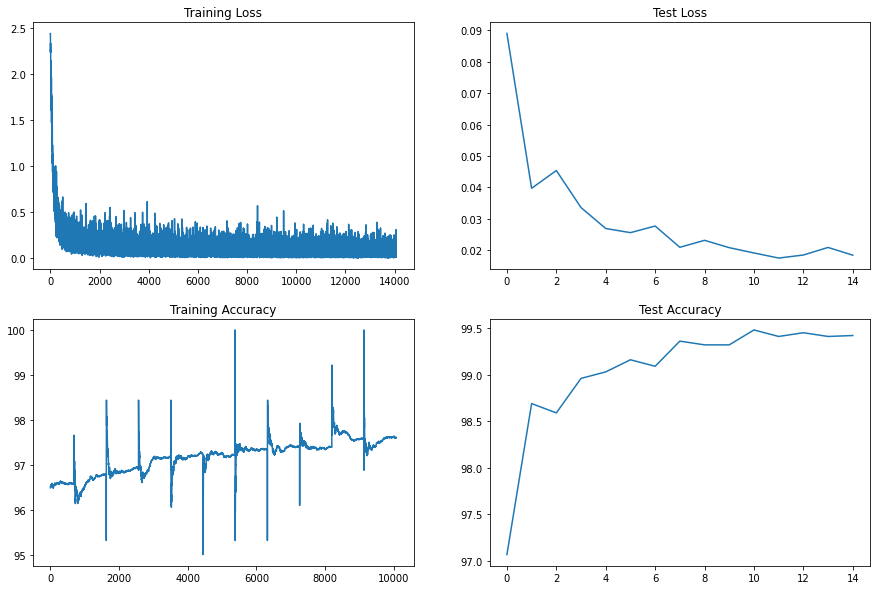

In [ ]:
draw_graphs()